Exploratory Scenario Discovery using Prime Induction Method (PRIM) on the experiments including policies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ema_workbench
from ema_workbench import Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)



<Logger EMA (DEBUG)>

In [2]:
# import data (samples) 

# import the dike_model_experiments.csv file
df_experiments = pd.read_csv('experiments(policy).csv')

# import the dike_model_outcomes.csv file
df_outcomes = pd.read_csv('outcomes(policy).csv')


PRIM 1: Overijssel Expected Annual Damage


In [3]:
# specify x and y variables

# select all uncertainties and policy levers. Therefore, only disregard the last three columns, which don't display usefull information

x_1 = df_experiments.iloc[:, :-3]

# as taregt, look at the Overijssel Expected Annual Damage, where the threshold damage value is set to the maximum 10% percentile of the expected annual damage
y_1 = df_outcomes['Overijssel Expected Annual Damage'] > df_outcomes['Overijssel Expected Annual Damage'].quantile(0.9)

In [4]:
# create first box (x = independent variable, y = dependent variable)

prim_alg = prim.Prim(x_1, y_1, threshold=0.6, peel_alpha=0.1)
box1 = prim_alg.find_box()


[MainProcess/INFO] 25000 points remaining, containing 2500 cases of interest
c:\Users\tlwal\AppData\Local\Programs\Python\Python313\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
c:\Users\tlwal\AppData\Local\Programs\Python\Python313\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
c:\Users\tlwal\AppData\Local\Programs\Python\Python313\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will rai

Box inspections

To explore under which conditions the damage is high, three possible boxes are inspected: 
- One with a high density, relatively low coverage and the highest number of restricted dimensions
- One with a moderate density, coverage and number of restricted dimensions
- One with a relatively low density, high coverage and a low number of restricted dimensions

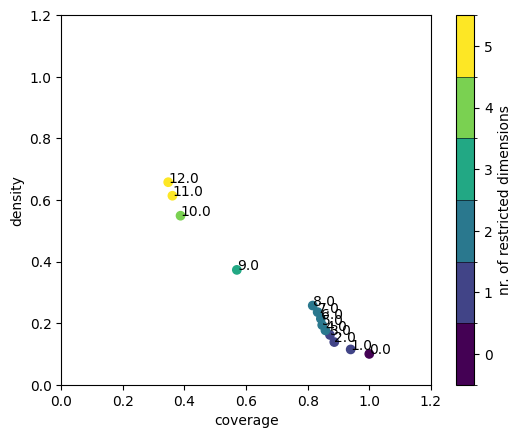

In [5]:
# Plot the density - coverage trade-off

box1.show_tradeoff(annotated=True)
plt.show()

In [6]:
# inspect point - point with a high density and relatively low coverage

point_1_1 = 11
box1.inspect(point_1_1)

coverage       0.360800
density        0.613605
id            11.000000
k            902.000000
mass           0.058800
mean           0.613605
n           1470.000000
res_dim        5.000000
Name: 11, dtype: float64

                      box 11                                       
                         min       max      qp value       qp value
A.5_DikeIncrease 0  0.000000  5.000000           NaN  2.404267e-136
A.5_pfail           0.000444  0.588486           NaN   9.000101e-69
1_RfR 0             0.000000  0.000000           NaN   8.644319e-43
3_RfR 1             0.000000  0.000000           NaN   2.897946e-07
0_RfR 1             1.000000  1.000000  9.443549e-20            NaN



[None]

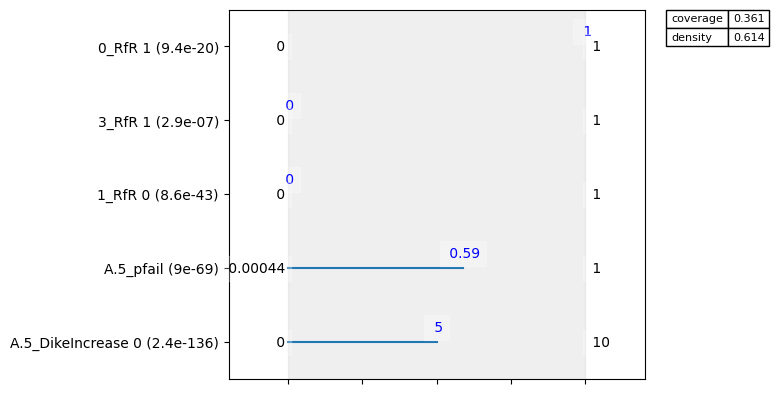

In [17]:
# inspect box limits for the selected point
box1.inspect(point_1_1, style='graph')
plt.show()

In [ ]:
#Further inspect the box limits using pair wise 
box1.select(point_1_1)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

KeyboardInterrupt: 

In [7]:
# inspect point - point with an average density and coverage

point_1_2 = 9
box1.inspect(point_1_2)

coverage       0.570000
density        0.372841
id             9.000000
k           1425.000000
mass           0.152880
mean           0.372841
n           3822.000000
res_dim        3.000000
Name: 9, dtype: float64

                       box 9                                       
                         min       max      qp value       qp value
A.5_DikeIncrease 0  0.000000  5.000000           NaN  2.627375e-118
A.5_pfail           0.000444  0.588486           NaN   1.984778e-80
0_RfR 1             1.000000  1.000000  6.320804e-56            NaN



[None]

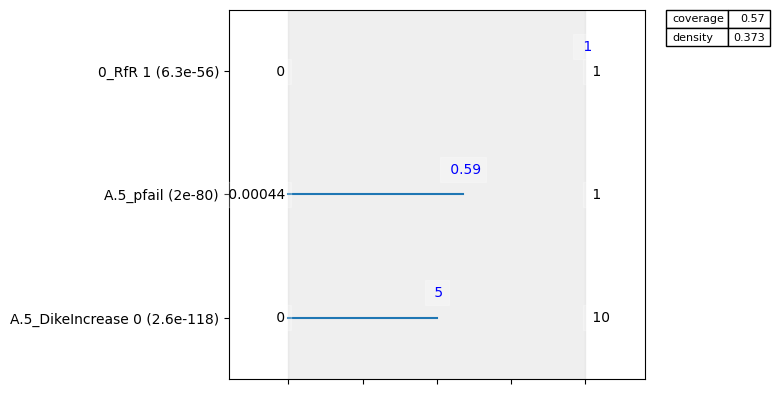

In [8]:
# inspect box limits for the selected point
box1.inspect(point_1_2, style='graph')
plt.show()

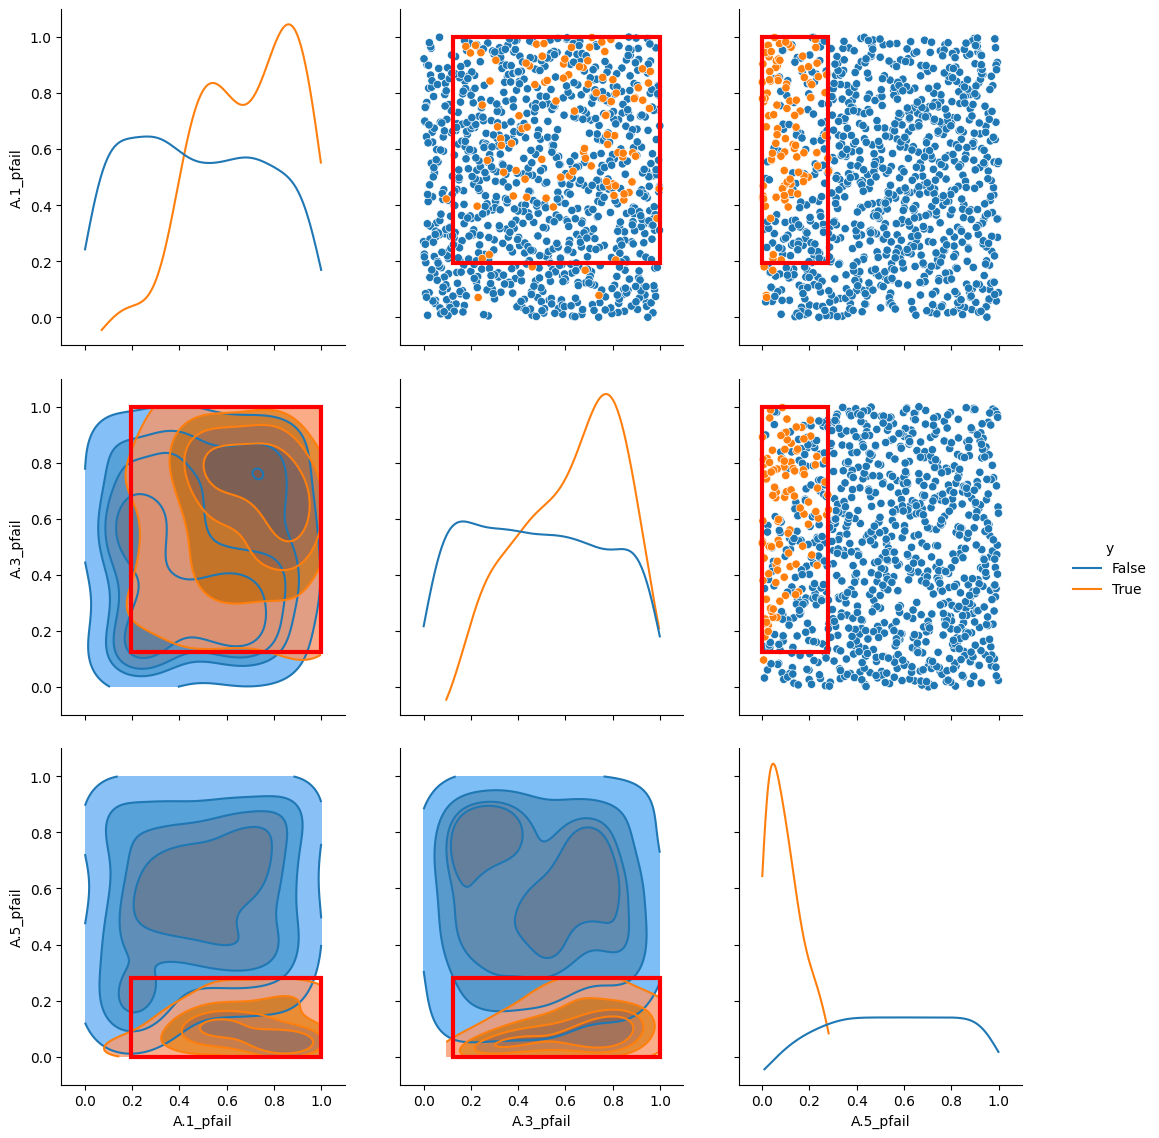

In [83]:
#Further inspect the box limits using pair wise 
box1.select(point_1_2)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [10]:
# inspect point - point with a relatively low density and high coverage

point_1_3 = 5
box1.inspect(point_1_3)

coverage        0.84720
density         0.19369
id              5.00000
k            2118.00000
mass            0.43740
mean            0.19369
n           10935.00000
res_dim         2.00000
Name: 5, dtype: float64

                       box 5                                  
                         min       max qp value       qp value
A.5_DikeIncrease 0  0.000000  5.000000      NaN  7.392571e-118
A.5_pfail           0.000444  0.810054      NaN   2.887012e-19



[None]

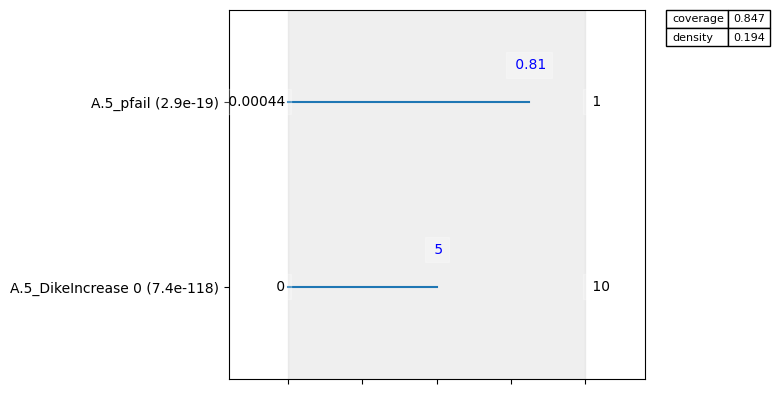

In [11]:
# inspect box limits for the selected point
box1.inspect(point_1_3, style='graph')
plt.show()

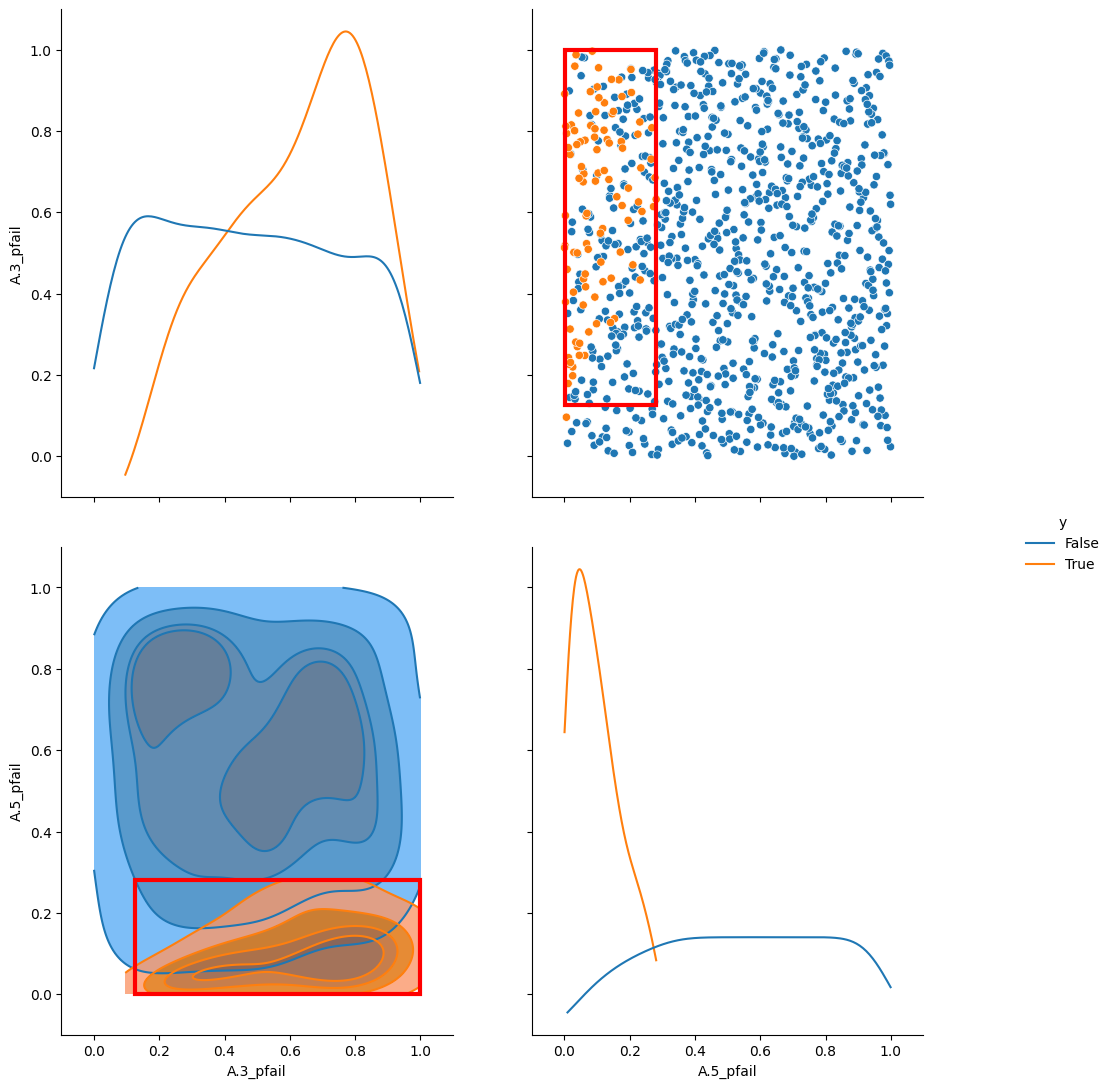

In [93]:
#Further inspect the box limits using pair wise 
box1.select(point_1_3)
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Interpret results PRIM 1

- Implementation of RfR project 0
- P_fail A_5
- (slight) dike increase at A_5

PRIM 3: Overijssel Expected Number of Deaths	

In [12]:
# specify x and y variables

# select all uncertainties and policy levers. Therefore, only disregard the last three columns, which don't display usefull information

x_3 = df_experiments.iloc[:, :-3]

# as taregt, look at the Overijssel Expected Number of Deaths, where the threshold damage value is set to the maximum 10% percentile of the expected annual damage
y_3 = df_outcomes['Overijssel Expected Number of Deaths'] > df_outcomes['Overijssel Expected Number of Deaths'].quantile(0.9)

In [13]:
# create third box (x_3 = independent variable, y_3 = dependent variable)

prim_alg = prim.Prim(x_3, y_3, threshold=0.7, peel_alpha=0.1)
box3 = prim_alg.find_box()


[MainProcess/INFO] 25000 points remaining, containing 2500 cases of interest
c:\Users\tlwal\AppData\Local\Programs\Python\Python313\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
c:\Users\tlwal\AppData\Local\Programs\Python\Python313\Lib\site-packages\ema_workbench\analysis\prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
[MainProcess/INFO] mean: 0.7305905773059058, mass: 0.06028, coverage: 0.4404, density: 0.7305905773059058 restricted_dimensions: 4


Box inspections

To explore under which conditions the damage is high, three possible boxes are inspected: 
- One with a high density, relatively low coverage and the highest number of restricted dimensions
- One with a moderate density, coverage and number of restricted dimensions
- One with a relatively low density, high coverage and a low number of restricted dimensions

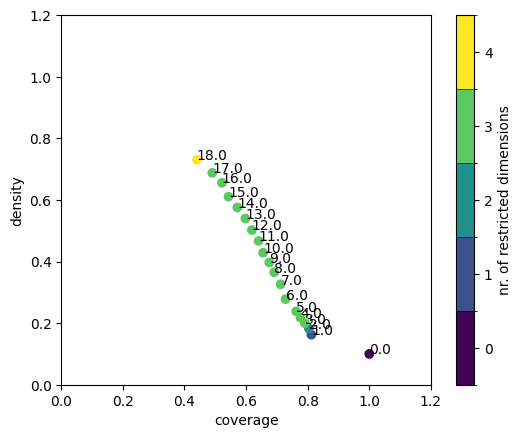

In [14]:
# Plot the density - coverage trade-off

box3.show_tradeoff(annotated=True)
plt.show()

In [15]:
# inspect points - point with a high density and relatively low coverage

point_3_1 = 18
box3.inspect(point_3_1)

coverage       0.440400
density        0.730591
id            18.000000
k           1101.000000
mass           0.060280
mean           0.730591
n           1507.000000
res_dim        4.000000
Name: 18, dtype: float64

                      box 18                                    
                         min        max  qp value       qp value
A.5_pfail           0.000444   0.274403       NaN  1.112008e-265
A.5_DikeIncrease 0  0.000000   4.000000       NaN  3.462854e-147
0_RfR 0             0.000000   0.000000       NaN   2.436372e-42
A.5_DikeIncrease 2  1.000000  10.000000  0.000159            NaN



[None]

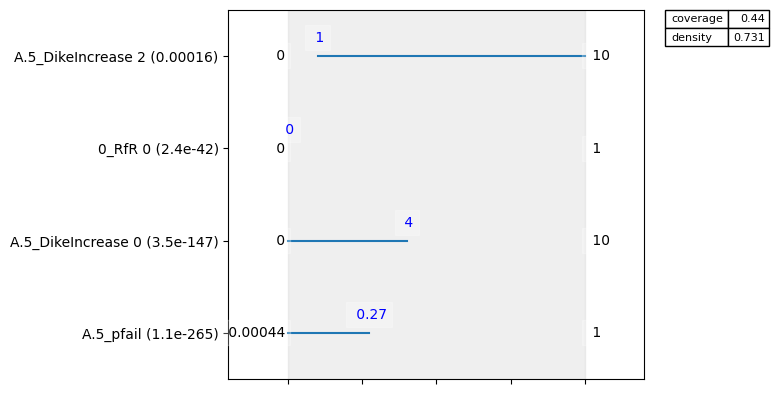

In [16]:
# inspect box limits for the selected point
box3.inspect(point_3_1, style='graph')
plt.show()

In [98]:
# Resample the box to check the relevance of the above identified parameters > only if works with parameters!
# box3.resample(point_3_1)


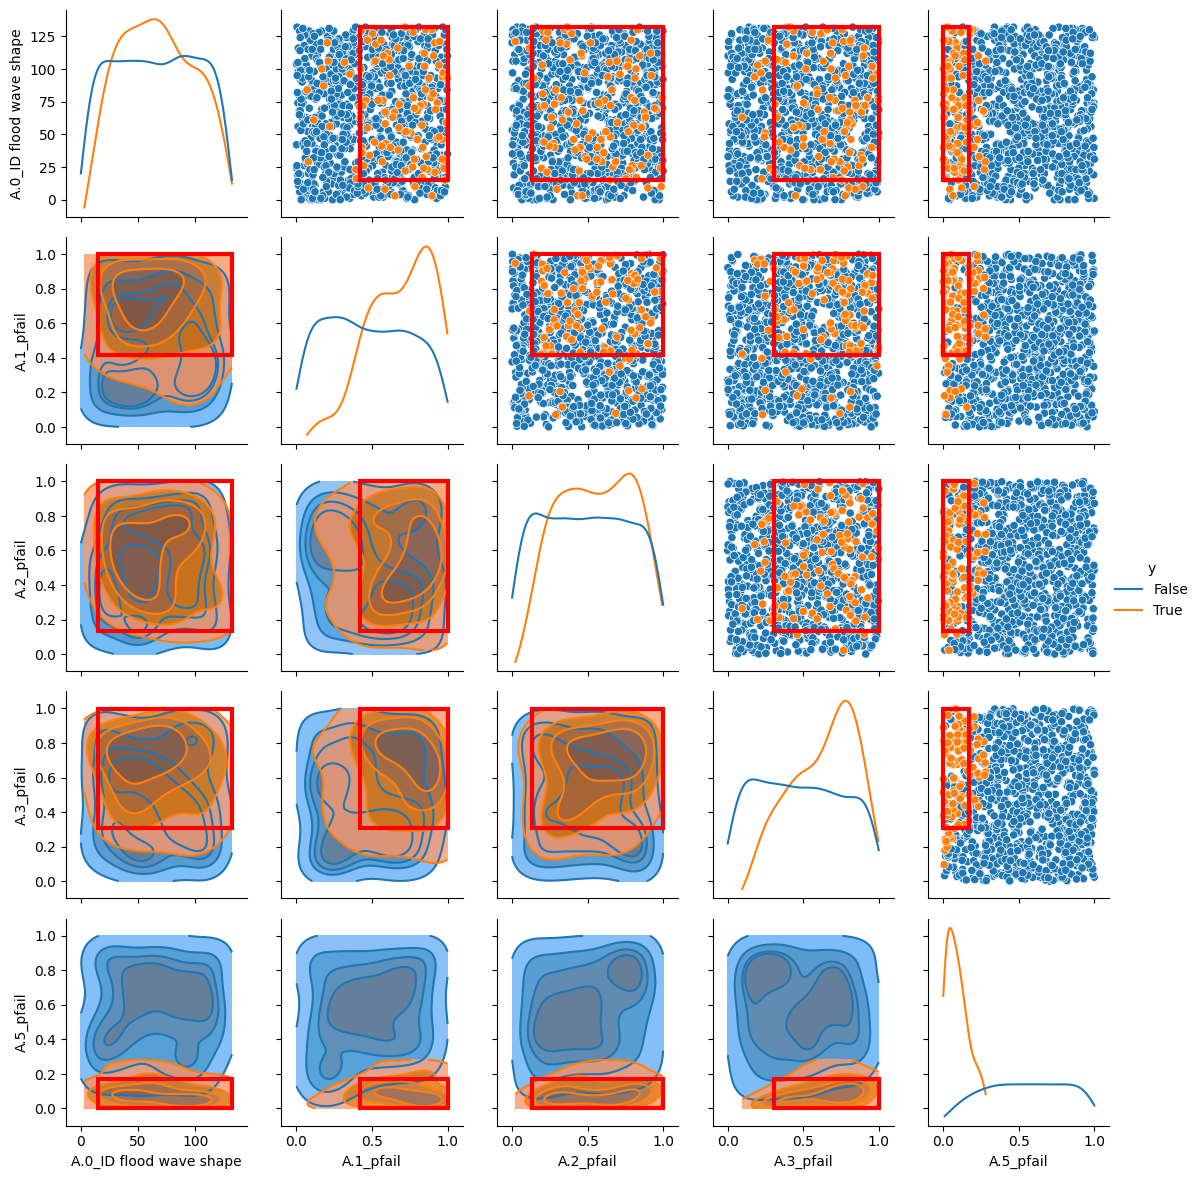

In [99]:
#Further inspect the box limits using pair wise 
box3.select(point_3_1)
box3.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [17]:
# inspect points - point with a moderate density and moderate coverage

point_3_2 = 11
box3.inspect(point_3_2)

coverage       0.640800
density        0.466783
id            11.000000
k           1602.000000
mass           0.137280
mean           0.466783
n           3432.000000
res_dim        3.000000
Name: 11, dtype: float64

                      box 11                                  
                         min       max qp value       qp value
A.5_DikeIncrease 0  0.000000  4.000000      NaN  1.854355e-137
A.5_pfail           0.000444  0.528382      NaN  7.660362e-125
0_RfR 0             0.000000  0.000000      NaN   4.877858e-55



[None]

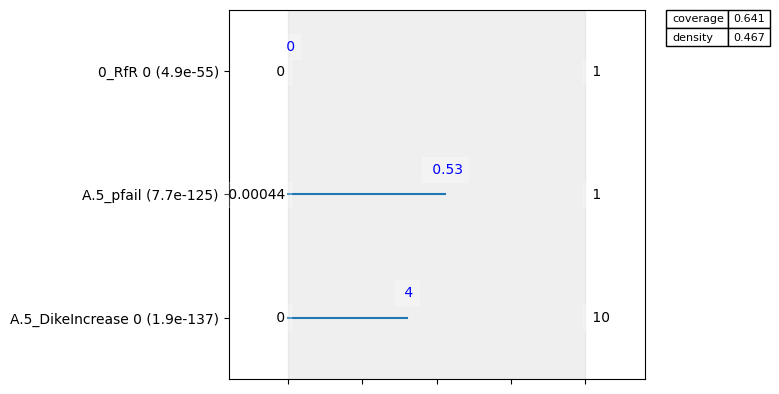

In [18]:
# inspect box limits for the selected point
box3.inspect(point_3_2, style='graph')
plt.show()

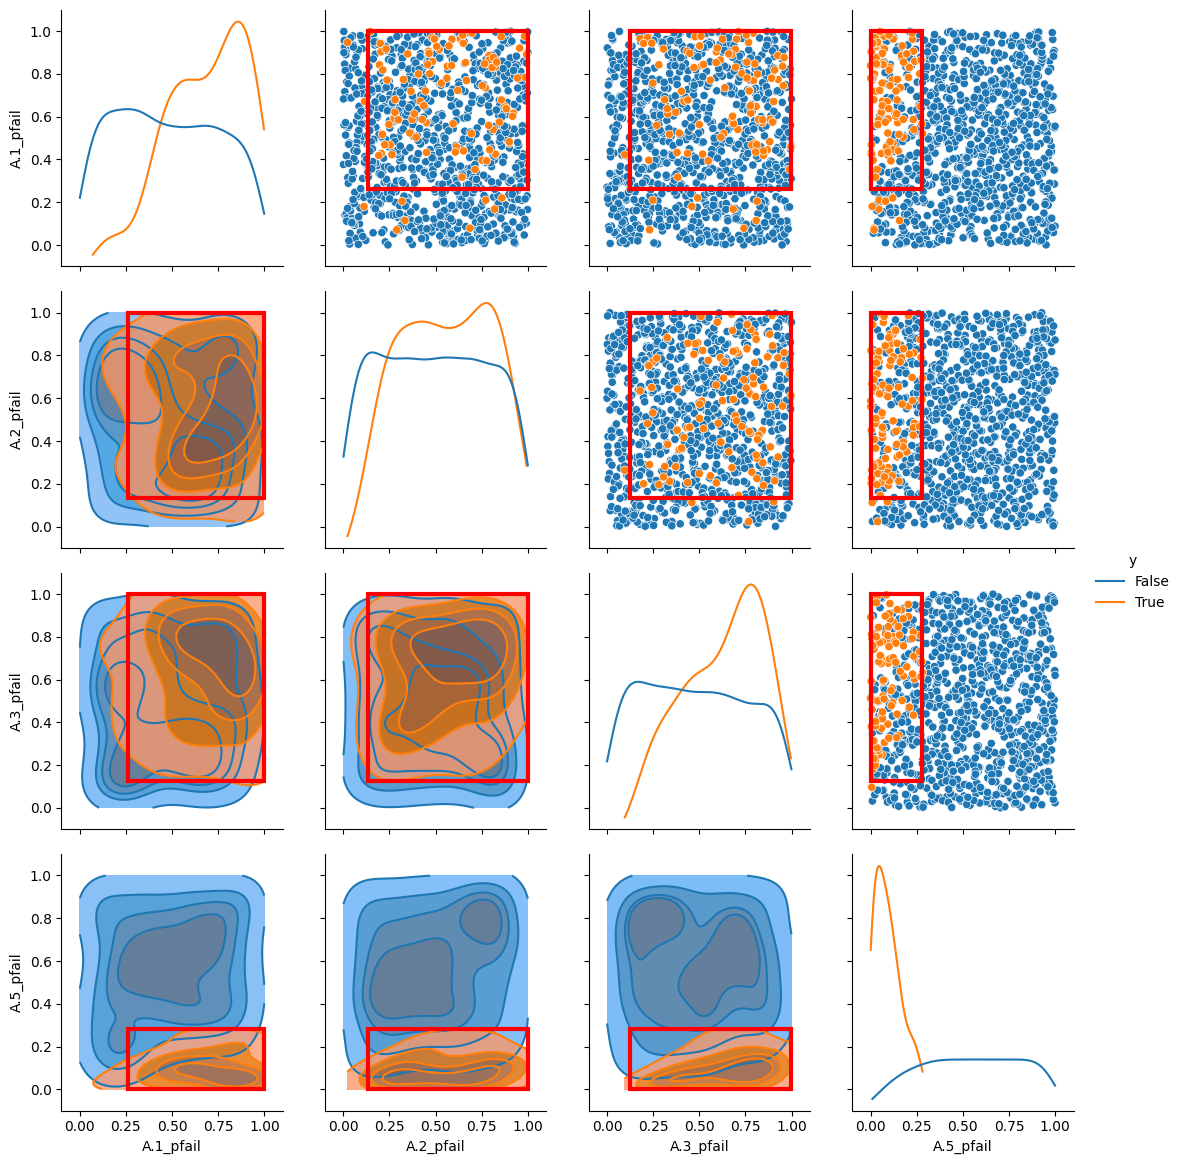

In [103]:
#Further inspect the box limits using pair wise 
box3.select(point_3_2)
box3.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [19]:
# inspect points - point with a relatively low density and high coverage

point_3_3 = 2
box3.inspect(point_3_3)

coverage        0.804000
density         0.182727
id              2.000000
k            2010.000000
mass            0.440000
mean            0.182727
n           11000.000000
res_dim         2.000000
Name: 2, dtype: float64

                   box 2                             
                     min  max qp value       qp value
0_RfR 0              0.0  0.0      NaN  1.746651e-120
A.5_DikeIncrease 0   0.0  9.0      NaN   6.783435e-09



[None]

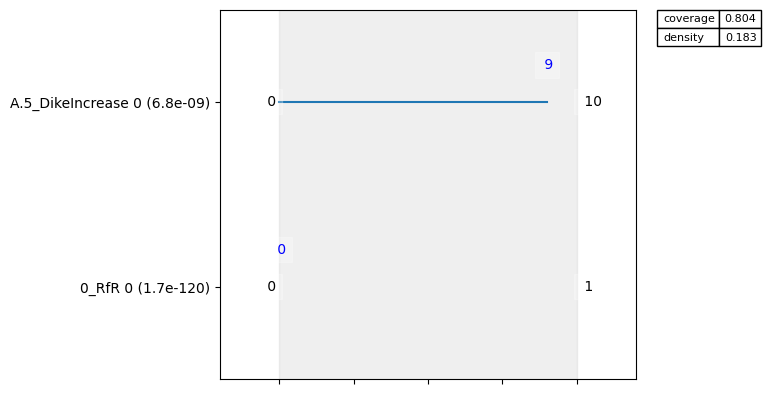

In [20]:
# inspect box limits for the selected point
box3.inspect(point_3_3, style='graph')
plt.show()

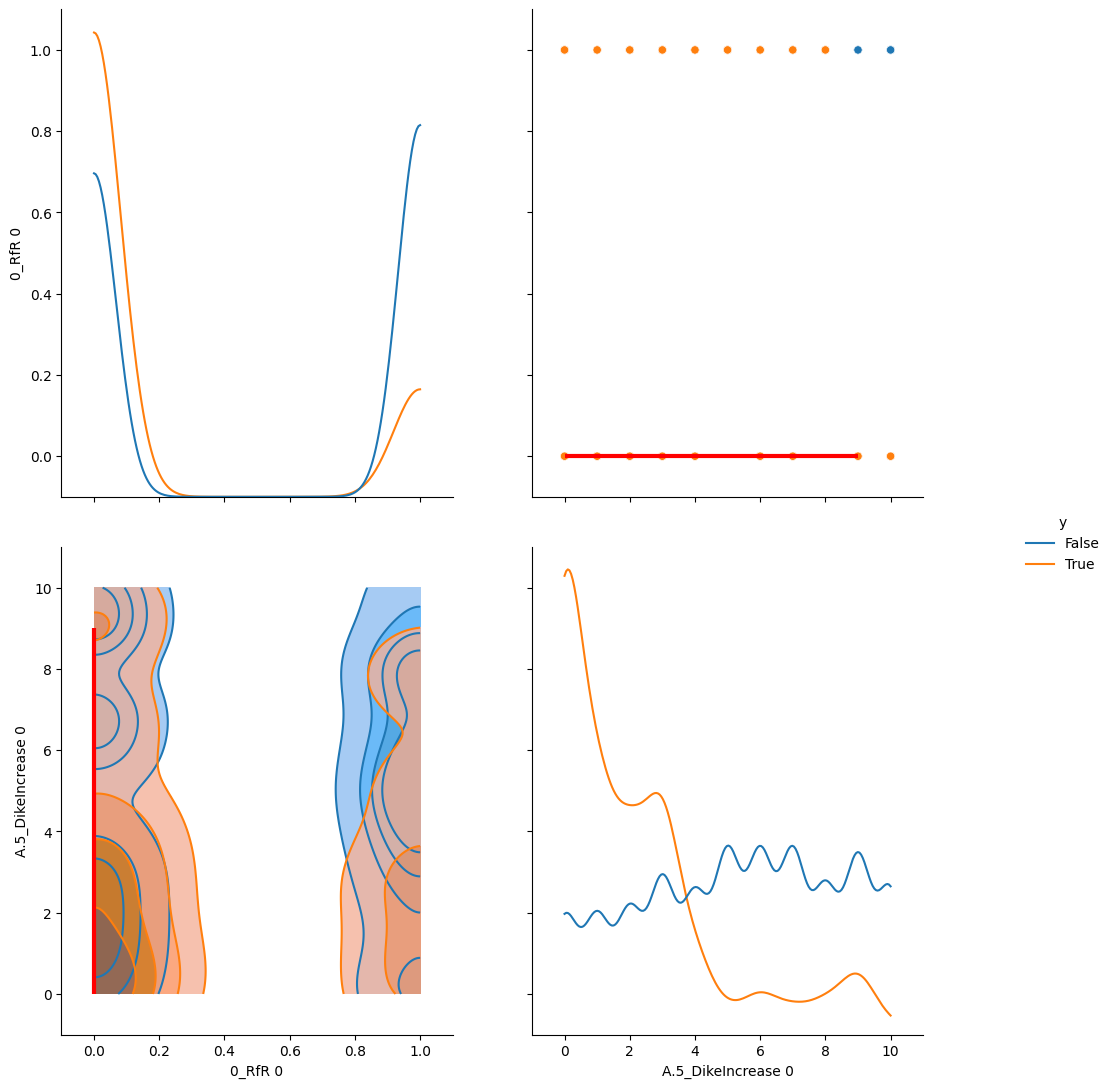

In [21]:
#Further inspect the box limits using pair wise 
box3.select(point_3_3)
box3.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Intepret PRIM 3

- No RfR project 0 
- Also P_Fail A_5
- Also dikeincrease A_5
